In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline



df = pd.read_csv("data/ndtv_data_final.csv", index_col=0)
print(df.isna().any().any())
print(df.loc[df['Price'].idxmin()])
df.info()

False
Name                      Lyf Water 7
Brand                             Lyf
Model                         Water 7
Battery capacity (mAh)           3000
Screen size (inches)              5.5
Touchscreen                       Yes
Resolution x                     1080
Resolution y                     1920
Processor                           8
RAM (MB)                         2000
Internal storage (GB)            16.0
Rear camera                      13.0
Front camera                      5.0
Operating system              Android
Wi-Fi                             Yes
Bluetooth                         Yes
GPS                               Yes
Number of SIMs                      2
3G                                Yes
4G/ LTE                           Yes
Price                             494
Name: 1101, dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1358
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------    

In [2]:
categorical = ["Brand","Touchscreen","Operating system","Wi-Fi","Bluetooth","GPS","3G","4G/ LTE"]

label_enc = LabelEncoder()

# encode categorical 
encodings = {}
reverse_encodings = {}
for col in categorical:
    label_enc.fit(df[col])
    transforms = label_enc.transform(label_enc.classes_)
    encodings[col] = dict(zip(label_enc.classes_, map(int, transforms)))
    reverse_encodings[col] = dict(zip(map(int, transforms), label_enc.classes_))

print(encodings)

df[categorical] = df[categorical].apply(lambda col: label_enc.fit_transform(col))

# convert INR to USD as of 10/22
df["Price"] = round(df["Price"] * 0.012, 2)
df["RAM"] = df["RAM (MB)"] / 1000

df = df.drop(columns=["Name", "Model", "RAM (MB)"])

# change column names
col_rename = {
    "Battery capacity (mAh)" : "Battery",
    "Internal storage (GB)" : "Storage",
    "Operating system" : "OS",
    "Wi-Fi" : "WiFi",
    "4G/ LTE": "4G",
    "Screen size (inches)" : "Screen size",
    "Number of SIMs" : "nSIM"
}

df.rename(columns=col_rename, inplace=True)

{'Brand': {'10.or': 0, 'Acer': 1, 'Alcatel': 2, 'Apple': 3, 'Aqua': 4, 'Asus': 5, 'Billion': 6, 'Black Shark': 7, 'BlackBerry': 8, 'Blu': 9, 'Cat': 10, 'Celkon': 11, 'Comio': 12, 'Coolpad': 13, 'Gionee': 14, 'Google': 15, 'HP': 16, 'HTC': 17, 'Homtom': 18, 'Honor': 19, 'Huawei': 20, 'InFocus': 21, 'Infinix': 22, 'Intex': 23, 'Itel': 24, 'Jio': 25, 'Jivi': 26, 'Karbonn': 27, 'Kult': 28, 'LG': 29, 'Lava': 30, 'LeEco': 31, 'Lenovo': 32, 'Lephone': 33, 'Lyf': 34, 'M-tech': 35, 'Meizu': 36, 'Micromax': 37, 'Microsoft': 38, 'Mobiistar': 39, 'Motorola': 40, 'Nokia': 41, 'Nubia': 42, 'Nuu Mobile': 43, 'OnePlus': 44, 'Onida': 45, 'Oppo': 46, 'Panasonic': 47, 'Phicomm': 48, 'Philips': 49, 'Poco': 50, 'Razer': 51, 'Reach': 52, 'Realme': 53, 'Samsung': 54, 'Sansui': 55, 'Smartron': 56, 'Sony': 57, 'Spice': 58, 'Swipe': 59, 'TCL': 60, 'Tambo': 61, 'Tecno': 62, 'Videocon': 63, 'Vivo': 64, 'Xiaomi': 65, 'Xolo': 66, 'Yu': 67, 'ZTE': 68, 'Zen': 69, 'Ziox': 70, 'Zopo': 71, 'Zuk': 72, 'iBall': 73, 'iVoom

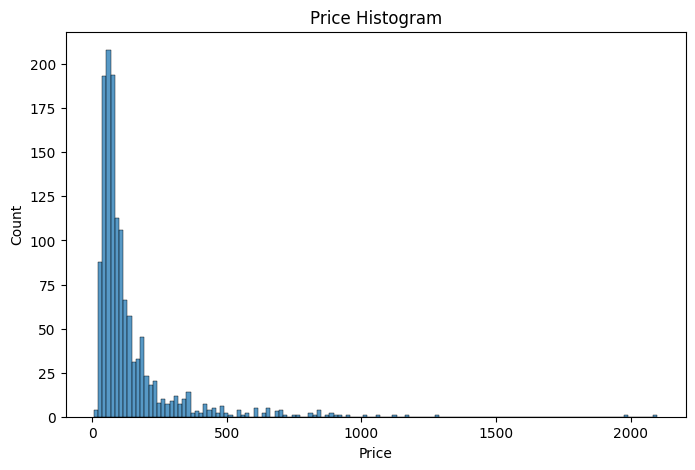

[5, 11, 11, 14, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 

In [3]:
plt.figure(figsize=(8,5))

sns.histplot(df['Price'])
plt.title('Price Histogram')
plt.show()
print(sorted(list(map(int, df["Price"]))))

price_bin
0    1142
1     139
2      78
Name: count, dtype: int64


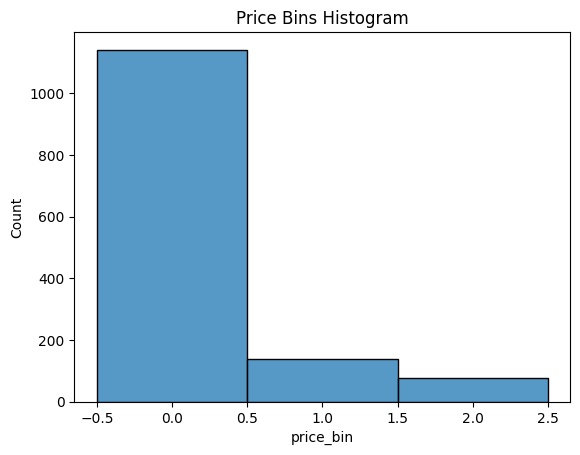

In [3]:
# Define ranges based on standard deviations
bins = [0, 200, 400, float('inf')]  # Bin edges
# Low: 0, Medium: 1, High: 2
labels = [0, 1, 2]  # Bin labels

# Apply custom bins using pd.cut
df['price_bin'] = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True)

bin_counts = df['price_bin'].value_counts()
print(bin_counts)

plt.title('Price Bins Histogram')
sns.histplot(df['price_bin'])
plt.show()

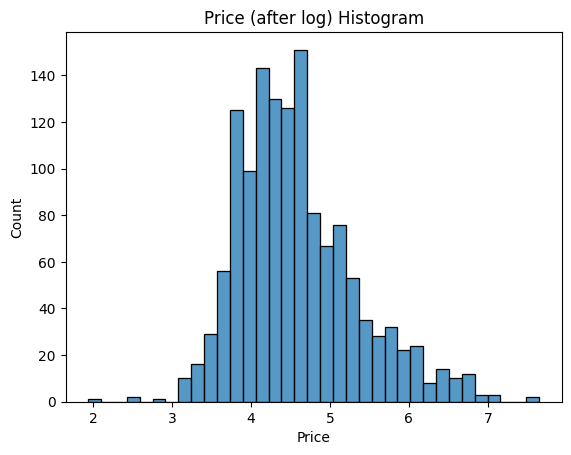

In [5]:
df["Price"] = np.log1p(df["Price"])
plt.title('Price (after log) Histogram')
sns.histplot(df['Price'])
plt.show()

In [6]:
df.head()

,Brand,Battery,Screen size,Touchscreen,Resolution x,Resolution y,Processor,Storage,Rear camera,Front camera,OS,WiFi,Bluetooth,GPS,nSIM,3G,4G,Price,RAM,price_bin
0,44,4085,6.67,1,1440,3120,8,256.0,48.0,16.0,0,1,1,1,2,1,1,6.563827,12.0,2
1,53,4000,6.50,1,1080,2400,8,64.0,64.0,16.0,0,1,1,1,2,1,1,5.820053,6.0,1
2,3,3969,6.50,1,1242,2688,6,64.0,12.0,12.0,6,1,1,1,2,1,1,7.157580,4.0,2
3,3,3110,6.10,1,828,1792,6,64.0,12.0,12.0,6,1,1,1,2,1,1,6.627777,4.0,2
4,29,4000,6.40,1,1080,2340,8,128.0,12.0,32.0,0,1,1,1,1,0,0,6.398395,6.0,2


In [7]:
df.describe()

,Brand,Battery,Screen size,Touchscreen,Resolution x,Resolution y,Processor,Storage,Rear camera,Front camera,OS,WiFi,Bluetooth,GPS,nSIM,3G,4G,Price,RAM
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,37.951435,2938.489330,5.291310,0.987491,811.543046,1490.777778,5.551141,30.654864,12.070199,7.037969,0.178072,0.994113,0.988962,0.920530,1.833701,0.893304,0.744665,4.582614,2.488778
std,19.184224,873.514133,0.671357,0.111184,270.707271,557.780120,2.196562,36.950241,8.948337,6.295448,0.920598,0.076527,0.104517,0.270571,0.374457,0.308840,0.436210,0.754134,1.664440
min,0.000000,1010.000000,2.400000,0.000000,240.000000,320.000000,1.000000,0.064000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.935860,0.064000
25%,23.000000,2300.000000,5.000000,1.000000,720.000000,1280.000000,4.000000,8.000000,8.000000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,4.063194,1.000000
50%,37.000000,3000.000000,5.200000,1.000000,720.000000,1280.000000,4.000000,16.000000,12.200000,5.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,4.442534,2.000000
75%,54.000000,3500.000000,5.700000,1.000000,1080.000000,1920.000000,8.000000,32.000000,13.000000,8.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,4.976665,3.000000
max,75.000000,6000.000000,7.300000,1.000000,2160.000000,3840.000000,10.000000,512.000000,108.000000,48.000000,6.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,7.650112,12.000000


Text(0.5, 1.0, 'Screen size (in inches) occurence')

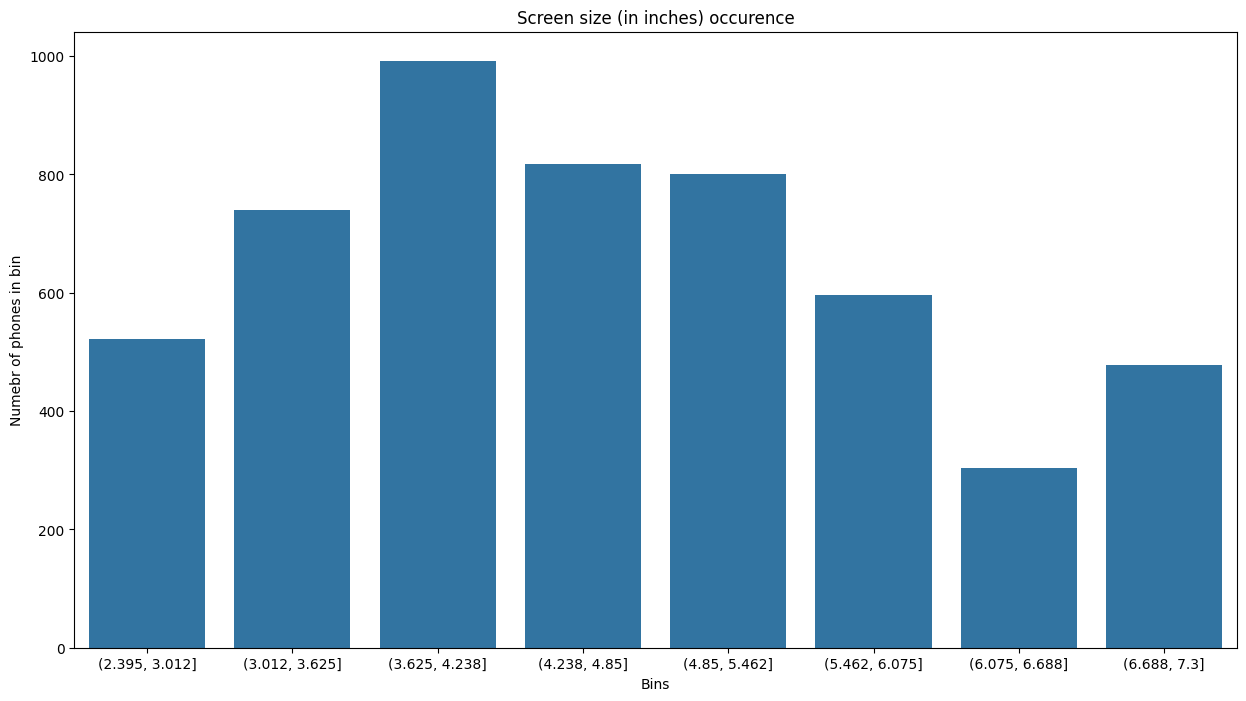

In [ ]:
screen_size_bins = pd.cut(df['Screen size'], 8)

x_labels = []
y_labels = []

for v in screen_size_bins.value_counts().index.categories:
    y_labels.append(screen_size_bins.value_counts()[v])
    x_labels.append(str(v))

fig, ax = plt.subplots(1)
fig.set_size_inches(12, 5)
ax.bar(x = x_labels, height= y_labels)
ax.set_xlabel('Bins')
ax.set_ylabel('Numebr of phones in bin')
ax.set_title('Screen size (in inches) occurence')

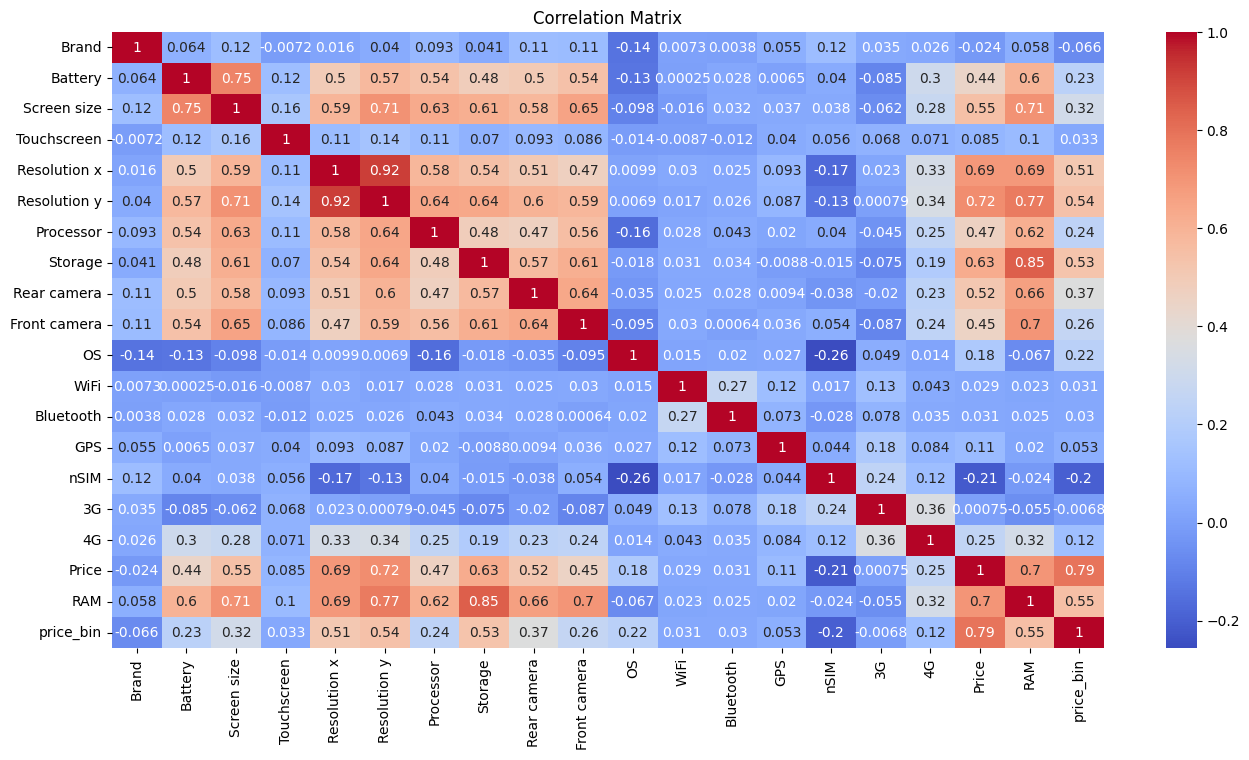

In [8]:
corr_matrix = df.corr()

np.round(corr_matrix, decimals=2)

plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
df = df.drop(columns=["3G", "Bluetooth", "WiFi","Touchscreen"])

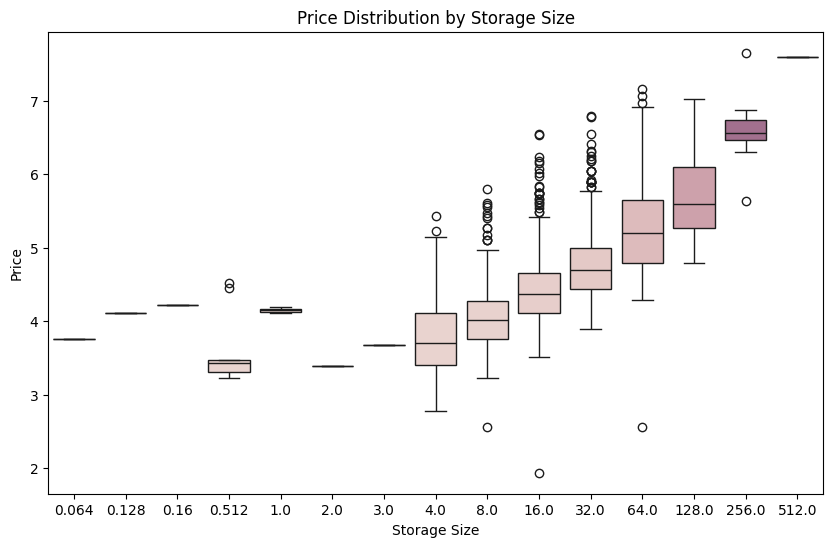

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Storage', y='Price', data=df, hue="Storage", legend=False)
plt.title('Price Distribution by Storage Size')
plt.xlabel('Storage Size')
plt.ylabel('Price')
plt.show()

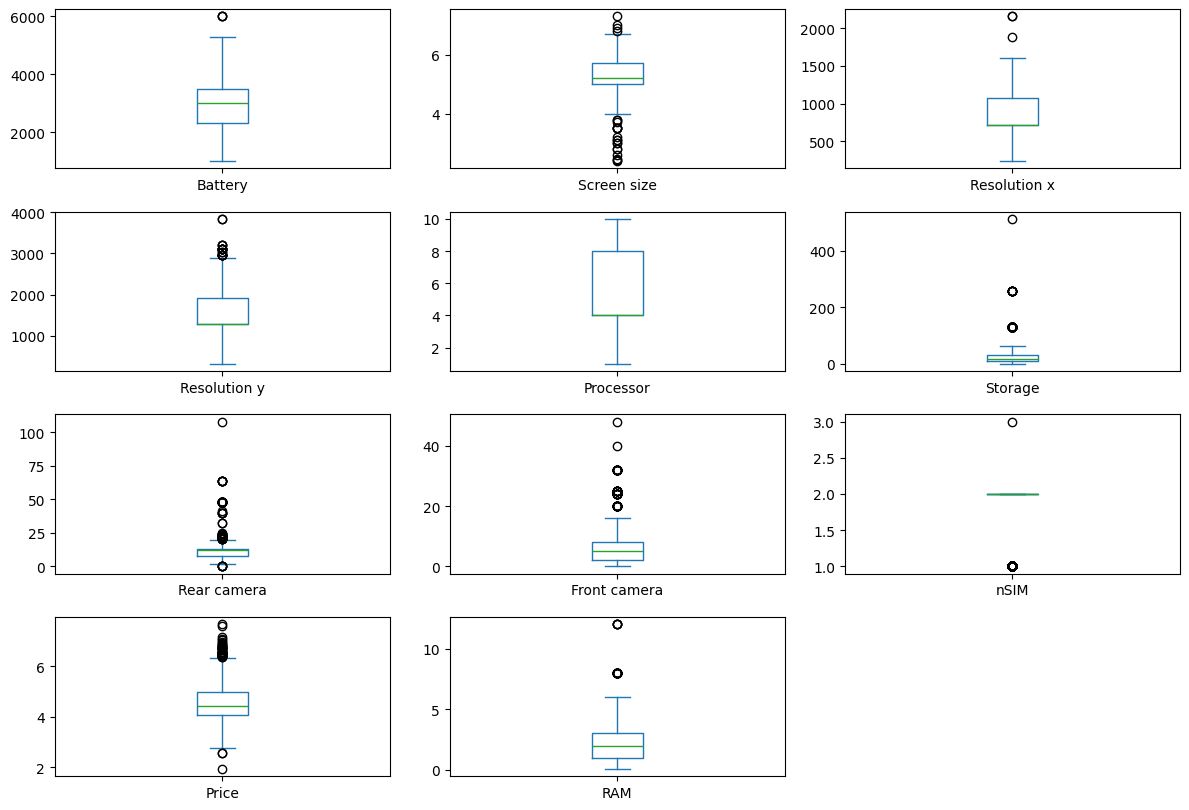

In [11]:
df_to_plot = df.drop(columns=["Brand", "OS", "GPS", "4G"])
num_columns = len(df_to_plot.columns)
rows = (num_columns // 3) + 1  # To arrange plots in 3 columns, adjust rows accordingly
df_to_plot.plot(kind='box', subplots=True, layout=(rows, 3), figsize=(12, rows * 2), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

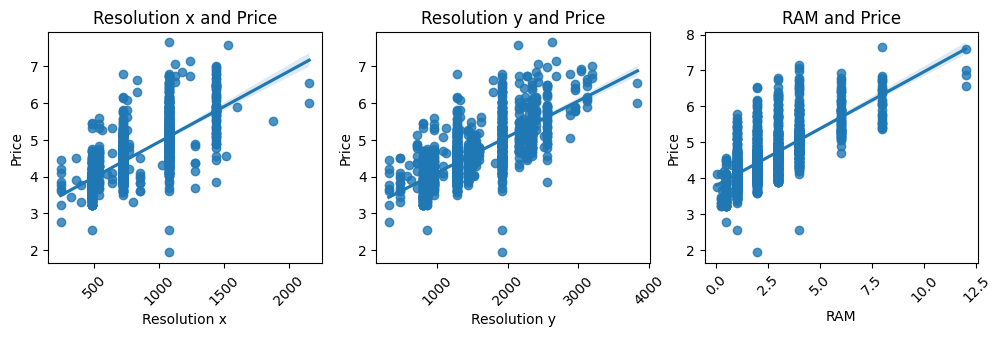

In [12]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
sns.regplot(x='Resolution x', y='Price', data=df)

plt.title('Resolution x and Price')
plt.xticks(rotation=45)
plt.xlabel('Resolution x')
plt.ylabel('Price')

plt.subplot(1, 3, 2)
sns.regplot(x='Resolution y', y='Price', data=df)

plt.title('Resolution y and Price')
plt.xticks(rotation=45)
plt.xlabel('Resolution y')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
sns.regplot(x='RAM', y='Price', data=df)

plt.title('RAM and Price')
plt.xticks(rotation=45)
plt.xlabel('RAM')
plt.ylabel('Price')

plt.show()

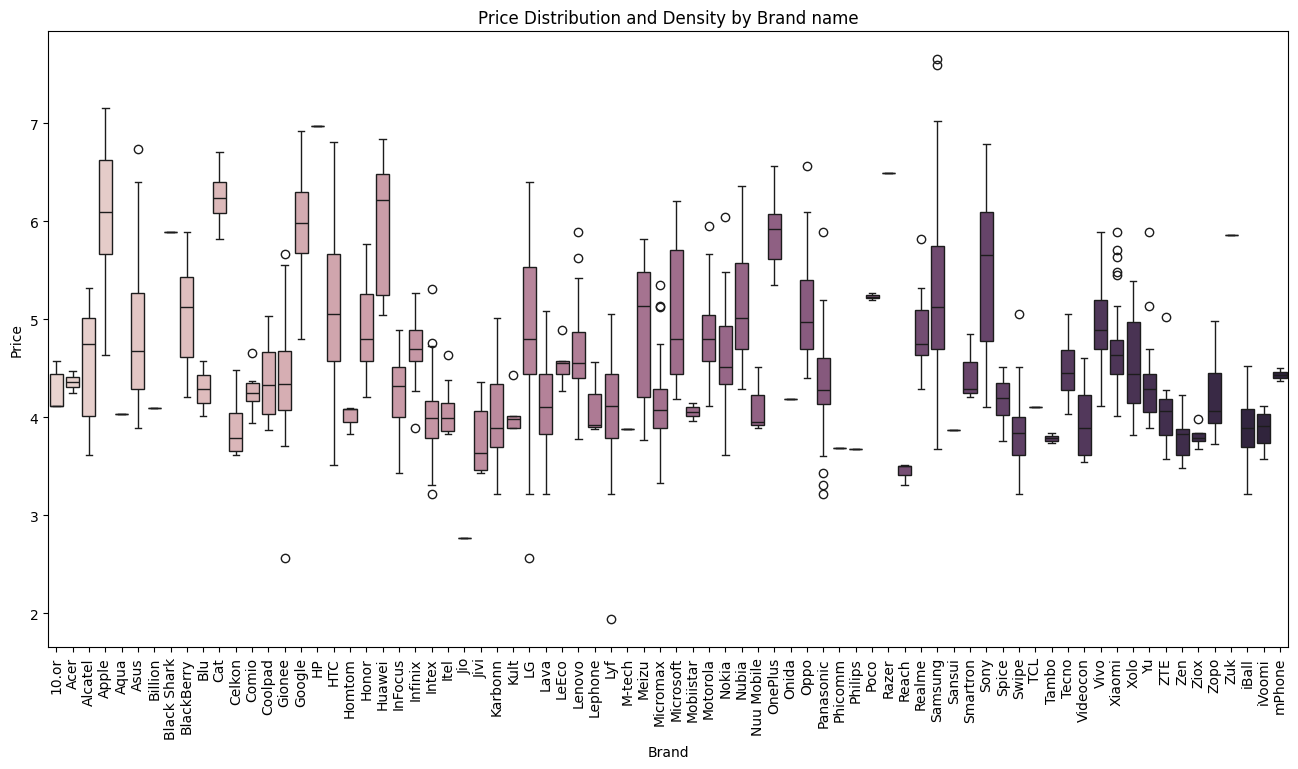

In [13]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Brand', y='Price', data=df, hue="Brand", legend=False)

plt.title('Price Distribution and Density by Brand name')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(ticks=list(reverse_encodings["Brand"].keys()), labels=list(reverse_encodings["Brand"].values()), rotation=90)


plt.show()


### Feature Selection

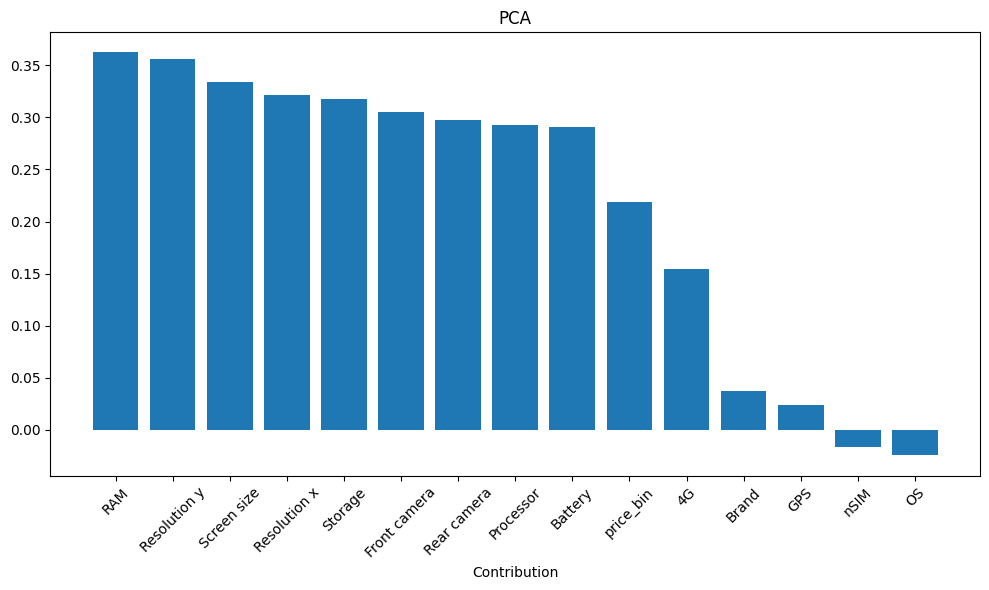

In [14]:
# PCA
def pca(df):
    df = df.drop(labels=['Price'], axis = 1, inplace=False)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    pca = PCA()
    pca.fit(scaled_data)
    
    components = pca.components_[0]
    
    contributions_df = pd.DataFrame({
        'Feature': df.columns,
        'Contribution': components
    })
    
    contributions_df = contributions_df.sort_values(by='Contribution')[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.bar(contributions_df['Feature'], contributions_df['Contribution'])
    plt.xlabel('Contribution')
    plt.xticks(rotation=45)
    plt.title("PCA")
    plt.tight_layout()
    plt.show()
pca(df)


In [15]:

df.to_csv("processed.csv")

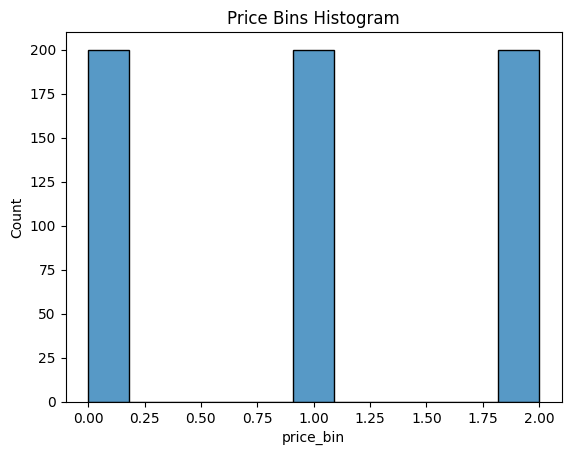

In [16]:
df = pd.read_csv('processed.csv', index_col=0)

df.drop(labels=['Price'], axis=1, inplace=True)

df = df.sample(frac=1, random_state=1)

over_sampling_strategy = {  
    1: 200,  
    2: 200   
}
under_sampling_strategy = { 
    0: 200
}

ros = RandomOverSampler(random_state=0,sampling_strategy=over_sampling_strategy)
rus = RandomUnderSampler(random_state=0,sampling_strategy=under_sampling_strategy)

pipeline = Pipeline([
    ('over',ros),
    ('under',rus)
])

X = df.drop(labels=['price_bin'], axis=1, inplace=False)
y = df['price_bin']

X_resampled, y_resampled = pipeline.fit_resample(X, y)

plt.title('Price Bins Histogram')
sns.histplot(y_resampled)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [17]:
from sklearn.feature_selection import f_classif

f, p = f_classif(X_train, y_train)


for i in range(len(f)):

    print(f"Column {X.columns[i]}: f-statistic {f[i]} & p value: {p[i]}")

Column Brand: f-statistic 2.7922294821850877 & p value: 0.06228647413676292
Column Battery: f-statistic 38.57872076584211 & p value: 2.952041523589596e-16
Column Screen size: f-statistic 57.109181552281974 & p value: 5.817759305562535e-23
Column Resolution x: f-statistic 134.7070878871761 & p value: 4.1776523017014945e-47
Column Resolution y: f-statistic 158.90960105000806 & p value: 1.2960798373815354e-53
Column Processor: f-statistic 26.869979614046787 & p value: 8.7564336883205e-12
Column Storage: f-statistic 72.7276403442434 & p value: 2.702951597817211e-28
Column Rear camera: f-statistic 29.25011523374186 & p value: 1.041007828103885e-12
Column Front camera: f-statistic 20.162810426664894 & p value: 3.9257473974659186e-09
Column OS: f-statistic 12.299893327951594 & p value: 6.185959473198008e-06
Column GPS: f-statistic 4.133508273067729 & p value: 0.0166042373444675
Column nSIM: f-statistic 7.189168686887386 & p value: 0.0008392973450666262
Column 4G: f-statistic 15.34554455912609

In [18]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train, y_train)

for i in range(len(mi)):

    print(f"Column {X.columns[i]} mutual information: {mi[i]}")

Column Brand mutual information: 0.33720436243810714
Column Battery mutual information: 0.23984758283521157
Column Screen size mutual information: 0.22229151589764928
Column Resolution x mutual information: 0.3236103404305155
Column Resolution y mutual information: 0.3949529608148241
Column Processor mutual information: 0.0706500985578038
Column Storage mutual information: 0.25381724421737917
Column Rear camera mutual information: 0.307796907378022
Column Front camera mutual information: 0.17766047331799828
Column OS mutual information: 0.04710001707526268
Column GPS mutual information: 0.01206077467600597
Column nSIM mutual information: 0.02634205501740805
Column 4G mutual information: 0.020903835667515303
Column RAM mutual information: 0.2106324030885136
